What's in lth_ecg_checkpoint.pth
checkpoint_state = {
            'step': step,
            'pruning_percentage': pruning_percentage,
            'current_mask': current_mask,
            'initial_weights': initial_untrained_model.state_dict(),
            'reduction_factor': initial_weights_number / remaining_weights_number,
            'history_theta': history_theta,
            'history_f1': history_f1,
            'layerwise_sparsity': current_mask.layerwise_sparsity(),
            'layerwise_remaining_params': current_mask.layerwise_remaining_params()
        }

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import tqdm
import sklearn

In [3]:
def load_checkpoint(filename):
    """Load one step of the pruning process"""
    print(f"--> Chargement du checkpoint : {filename}")
    return torch.load(filename, weights_only=False)

checkpoint_file = "lth_ecg_checkpoint.pth"
checkpoint = load_checkpoint(checkpoint_file)

--> Chargement du checkpoint : lth_ecg_checkpoint.pth


In [4]:
steps=checkpoint['step']
reduction_factor=checkpoint['reduction_factor']
theta=np.array(checkpoint['history_theta']) # Initial number of weights/Current number of weights at each step
f1_score=np.array(checkpoint['history_f1'])
layerwise_remaining_params=checkpoint['layerwise_remaining_params']

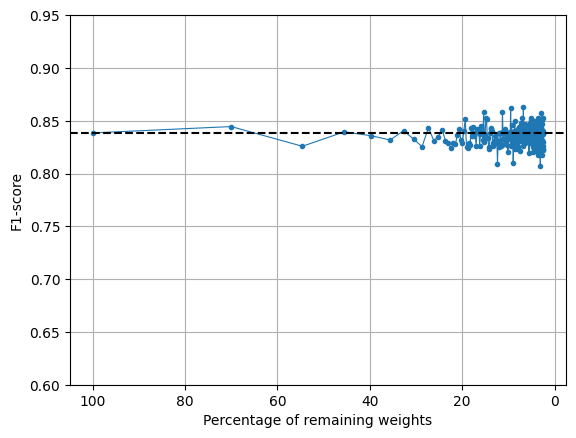

In [12]:
remaining_weights=1/theta*100

plt.figure()
plt.plot(remaining_weights, f1_score, linewidth=0.8, marker='.')
plt.axhline(y=f1_score[0], color='black', linestyle='--', label='Initial F1-score')
plt.xlabel("Percentage of remaining weights")
plt.ylabel("F1-score")
plt.grid(True)
plt.gca().invert_xaxis()
plt.ylim(0.6,0.95)

plt.show()

In [5]:
checkpoint2=load_checkpoint('new_lth_ecg_checkpoint.pth')

--> Chargement du checkpoint : new_lth_ecg_checkpoint.pth


In [ ]:
theta=np.array(checkpoint2['history_theta']) # Initial number of weights/Current number of weights at each step
f1_score=np.array(checkpoint2['history_f1'])
stops=np.array(checkpoint2['early'])